In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ROOT MEAN SQUARED (raiz da MÉDIA QUADRÁTICA)
def RMS(x,y):
    x= np.array(x)
    y= np.array(y)
    RMS = round(np.sqrt(np.sum(((y-x)/y)**2)/len(x)),2) #len(x) define o invervalo do array.
    return RMS

In [3]:
#corpo negro
df1 = pd.read_csv('NGC6905_bb_hden_var_rn_175_dez.csv')
#df1 = df1.drop([18,19],axis = 0) #optei por retirar essa linha para que os pontos fiquem mais próximos
#df1.reset_index(drop=True, inplace=True)
#df1
# --- pp
df2 = pd.read_csv('NGC6905_pp_hden_var_rn_175_dez.csv')
#-------[WR]-----------
df3 = pd.read_csv('NGC6905_wr_hden_var_rn_175_dez.csv')

In [4]:
df1

,Element,line,A1_Table9,A4_Table9,hden_4,hden_41,hden_42,hden_39
0,H_delta,4101.73,25.7,25.3,25.58,25.13,25.12,25.13
1,H_gamma,4340.46,46.2,45.8,46.44,47.25,46.52,47.27
2,[OIII],4363.00,13.8,11.0,12.43,11.01,9.12,14.09
3,HeI,4471.00,2.7,1.2,4.07,4.23,4.29,4.04
4,[OIII],4958.91,347.0,310.0,387.44,340.88,288.67,426.75
5,[OIII],5007.00,1037.0,926.0,1157.67,1018.45,862.38,1275.27
6,[CLIII],5517.71,1.5,0.7,0.87,0.77,0.67,0.96
7,[CLIII],5537.87,1.1,0.6,1.70,1.65,1.57,1.71
8,HeI,5875.64,9.9,3.6,12.72,12.73,13.09,12.12
9,H_alfa,6562.81,283.0,271.0,280.89,292.47,292.39,293.00


In [5]:
obs1 = df1.iloc[:,2]

#
bb_39 = df1.iloc[:,7].astype(float)
pp_39 = df2.iloc[:,7].astype(float)
wr_39 = df3.iloc[:,7].astype(float)

x = df1.iloc[:,1]
w1 = (bb_39-obs1)/obs1
w2 = (pp_39-obs1)/obs1
w3 = (wr_39-obs1)/obs1

RMS_models_39 = [RMS(bb_39,obs1),RMS(pp_39,obs1),RMS(wr_39,obs1)]
print(RMS_models_39)

[0.8, 0.87, 0.86]


In [6]:
obs1 = df1.iloc[:,2]

#
bb_42 = df1.iloc[:,6].astype(float)
pp_42 = df2.iloc[:,6].astype(float)
wr_42 = df3.iloc[:,6].astype(float)

x = df1.iloc[:,1]
z1 = (bb_42-obs1)/obs1
z2 = (pp_42-obs1)/obs1
z3 = (wr_42-obs1)/obs1

RMS_models_42 = [RMS(bb_42,obs1),RMS(pp_42,obs1),RMS(wr_42,obs1)]
print(RMS_models_42)

[1.0, 1.07, 1.09]


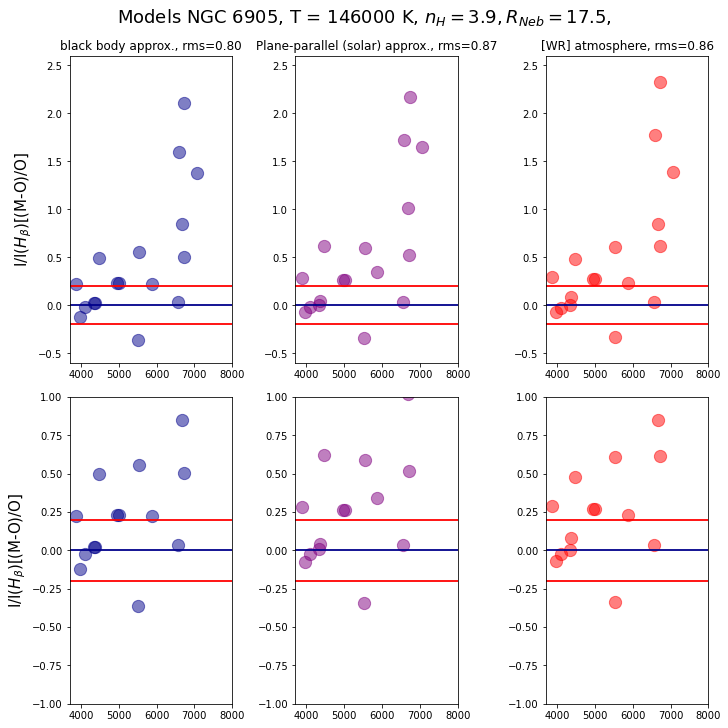

In [9]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(10,10),constrained_layout=True)
fig.suptitle('Models NGC 6905, T = 146000 K, $n_{H}=3.9, R_{Neb}=17.5,$', fontsize=18, color='black')

#parte superior 
ax1.scatter(x,w1,marker=('o'), color= 'darkblue',s =150,alpha=0.5)
ax2.scatter(x,w2,marker=('o'), color= 'purple',s=150,alpha=0.5)
ax3.scatter(x,w3,marker=('o'), color= 'red',s=150,alpha=0.5)
#------------------------------------------------------------
ax1.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax1.set_title('black body approx., rms=0.80', fontsize = 12) #título
ax1.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax1.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax1.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax2.set_title('Plane-parallel (solar) approx., rms=0.87', fontsize = 12) #título
ax2.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax2.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax2.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax3.set_title('[WR] atmosphere, rms=0.86', fontsize = 12) #título
ax3.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax3.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax3.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal



#parte inferior 
ax4.scatter(x,w1,marker=('o'), color= 'darkblue',s =150,alpha=0.5)
ax5.scatter(x,w2,marker=('o'), color= 'purple',s =150,alpha=0.5)
ax6.scatter(x,w3,marker=('o'), color= 'red',s =150,alpha=0.5)
#------------------------------------------------------------
ax4.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax4.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax4.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax4.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax5.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax5.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax5.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax6.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax6.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax6.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal


ax1.axis([3700,8000,-0.6,2.6]) #escala wr
ax2.axis([3700,8000,-0.6,2.6]) #escala wr
ax3.axis([3700,8000,-0.6,2.6]) #escala wr
ax4.axis([3700,8000,-1,1]) 
ax5.axis([3700,8000,-1,1])
ax6.axis([3700,8000,-1,1]) 


plt.savefig('NGC6905_hden39_rn_175.png')
plt.show()

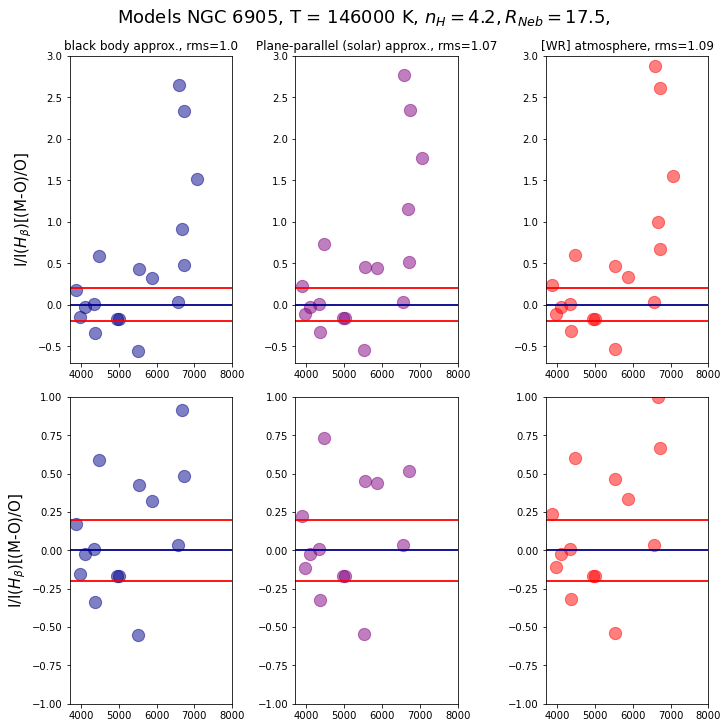

In [13]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(10,10),constrained_layout=True)
fig.suptitle('Models NGC 6905, T = 146000 K, $n_{H}=4.2, R_{Neb}=17.5,$', fontsize=18, color='black')

#parte superior 
ax1.scatter(x,z1,marker=('o'), color= 'darkblue',s =150,alpha=0.5)
ax2.scatter(x,z2,marker=('o'), color= 'purple',s=150,alpha=0.5)
ax3.scatter(x,z3,marker=('o'), color= 'red',s=150,alpha=0.5)
#------------------------------------------------------------
ax1.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax1.set_title('black body approx., rms=1.0', fontsize = 12) #título
ax1.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax1.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax1.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax2.set_title('Plane-parallel (solar) approx., rms=1.07', fontsize = 12) #título
ax2.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax2.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax2.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax3.set_title('[WR] atmosphere, rms=1.09', fontsize = 12) #título
ax3.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax3.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax3.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal



#parte inferior 
ax4.scatter(x,z1,marker=('o'), color= 'darkblue',s =150,alpha=0.5)
ax5.scatter(x,z2,marker=('o'), color= 'purple',s =150,alpha=0.5)
ax6.scatter(x,z3,marker=('o'), color= 'red',s =150,alpha=0.5)
#------------------------------------------------------------
ax4.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax4.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax4.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax4.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax5.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax5.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax5.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax6.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax6.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax6.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal


ax1.axis([3700,8000,-0.7,3.0]) #escala wr
ax2.axis([3700,8000,-0.7,3.0]) #escala wr
ax3.axis([3700,8000,-0.7,3.0]) #escala wr
ax4.axis([3700,8000,-1,1]) 
ax5.axis([3700,8000,-1,1])
ax6.axis([3700,8000,-1,1]) 


plt.savefig('NGC6905_hden42_rn_175.png')
plt.show()

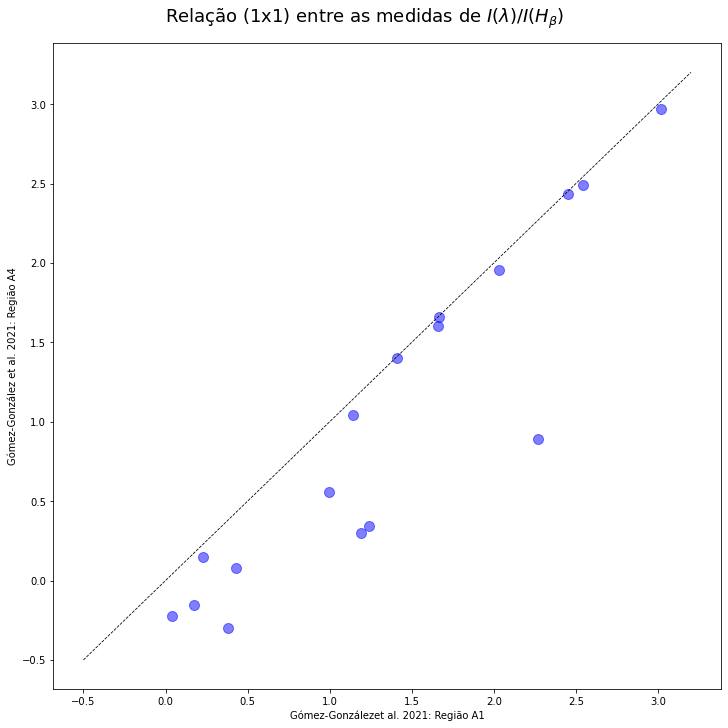

In [20]:
from numpy import log10
fig, (ax1) = plt.subplots(1, 1,figsize=(10,10),constrained_layout=True)
fig.suptitle('Relação (1x1) entre as medidas de $I({\lambda})$/$I(H_{\u03B2})$', fontsize=18, color='black')
#gráfico 1
ax1.scatter(log10(df1['A1_Table9']),log10(df1['A4_Table9']),marker='o', color= 'blue',s =100, alpha=0.5 )
ax1.plot(x,y, color= 'black', linestyle = '--',linewidth = 0.8 )
#ax1.axis([10,1000,10,1000]) 

ax1.set(xlabel="Gómez-Gonzálezet al. 2021: Região A1", ylabel= "Gómez-González et al. 2021: Região A4")
#ax1.set_xscale('log')
#ax1.set_yscale('log')

#for ax in fig.get_axes():
#    x.label_outer()
plt.savefig('Relacao_1x1_Gómez-González.png')
plt.show()